In [1]:
cd ..

C:\Users\johan\github\designresolver


In [34]:
from graphutils import draw_graph_graphical_props, flat_graph_formulation, Node, VAR, COMP, SOLVER
from nestedgraph import build_typedgraph
from compute import Var
from api import Model, adda, addf, addsolver, setsolvefor
from execution import edges_from_components
from operators import sort_scc, reorder_merge_solve
from nestedgraph import build_typedgraph

In [13]:
from sympy import exp

In [29]:
z1,z2,x,y2 = Var('z1'), Var('z2'), Var('x'), Var('y2')

In [43]:
model = Model()
m = model.root
s = addsolver(m)
y1 = adda(s, 'y1', z1**2+z2+x-0.2*y2)
adda(s, y2, y1**0.5+z1+z2)
addf(s, x**2+z1+y1+exp(-y2))
addf(s, 3.16-y1)
addf(s, y2-24)
setsolvefor(s, [x,z1,z2])

In [44]:
edges = edges_from_components(model.components)
tree = model.Ftree, model.Stree, model.Vtree

In [45]:
tree

(OrderedDict([(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]),
 {2: 1},
 {'x': 2, 'z1': 2, 'z2': 2})

In [46]:
nodetyperepr = {VAR: '{}', COMP: 'f_{}', SOLVER: 's_{}'}

In [47]:
graphs = build_typedgraph(edges, tree, nodetyperepr)

In [50]:
graphs[1].edges()

OutEdgeView([(s_2, y2), (s_2, x_x), (s_2, x_z1), (s_2, x_z2), (s_2, y1)])

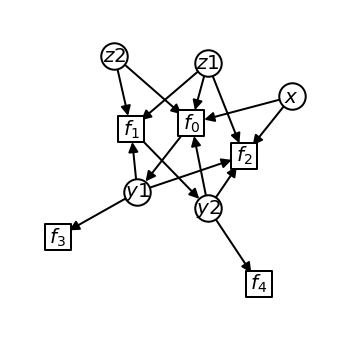

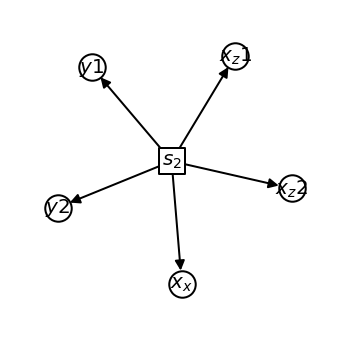

In [48]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='neato', figsize=(6,6))

In [35]:
G = flat_graph_formulation(*edges)
merge_order = sort_scc(G)

In [ ]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='neato', figsize=(6,6))

In [32]:
nedges, ntree = reorder_merge_solve(edges, tree, merge_order, 1, True)

({0: ('z1', 'z2', 'x', 'y2'),
  1: ('z1', 'z2', 'y1'),
  2: ('z1', 'x', 'y1', 'y2'),
  3: ('y1',),
  4: ('y2',)},
 {0: ('y1',), 1: ('y2',), 2: (None,), 3: (None,), 4: (None,)},
 {})